In [86]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P
from scipy.integrate import quad as integrate
from scipy.optimize import minimize

### functions

In [ ]:
def basis(N, n):             # basis polynomial
    p1 = P([1, -1])
    p2 = P([1, 1])
    return (p1)**(N-n+1) * (p2)**(n+1)

def psi(coeffs, N):          # trial wavefunction
    assert len(coeffs) == N + 1
    sum = 0
    
    for n in range(N + 1):
        sum += coeffs[n] * basis(N, n)
    
    return sum

# integrand terms in numerator and denominator of Rayleigh-Ritz ratio
def numerator(coeffs, N):
    return psi(coeffs, N) * psi(coeffs, N).deriv(2)

def denominator(coeffs, N):
    return psi(coeffs, N) ** 2

def Rayleigh_Ritz(coeffs, N):
    return -integrate(numerator(coeffs, N), -1, 1)[0] / integrate(denominator(coeffs, N), -1, 1)[0]

### numerical solution

In [130]:
E_arr = []             # approximate expectation values
coeffs_arr = []        # coefficients of basis polynomials

for N in range(5):
    x0 = [0.5] * (N + 1)
    soln = minimize(Rayleigh_Ritz, x0, args=N)
    
    E_arr.append(soln["fun"])
    coeffs_arr.append(soln["x"])

### expectation value
With increasing number of terms in trial wavefunctions, the numerical energy expectation values seem to converge to the exact solution:
$E = \pi^2 / 4$.

In [171]:
E = np.pi**2 / 4

print('E_exact = {:} \n'.format(E))
print('numerical soluion \t\t deviation [%]')
for N in range(5):
    print('E_{:} = {:} \t {:}'.format(N, E_arr[N], 100 * abs(E - E_arr[N]) / E))

E_exact = 2.4674011002723395 

numerical soluion 		 deviation [%]
E_0 = 2.500000000000001 	 1.3211836423378138
E_1 = 2.500000000000001 	 1.3211836423378138
E_2 = 2.4674374053334374 	 0.001471388705057158
E_3 = 2.467437405329221 	 0.001471388534181699
E_4 = 2.467401108748459 	 3.435241785783716e-07


### plotting normalized wavefuntions
The wavefunctions are normalized in the interval $[-1,1]$ and plotted below. For $n \in \{1, 2\}$, it is easy to notice the slight deviation especially near $x=0$. However, for higher $n$, the numerically obtained wavefunctions have very close resemblance to the exact solution.

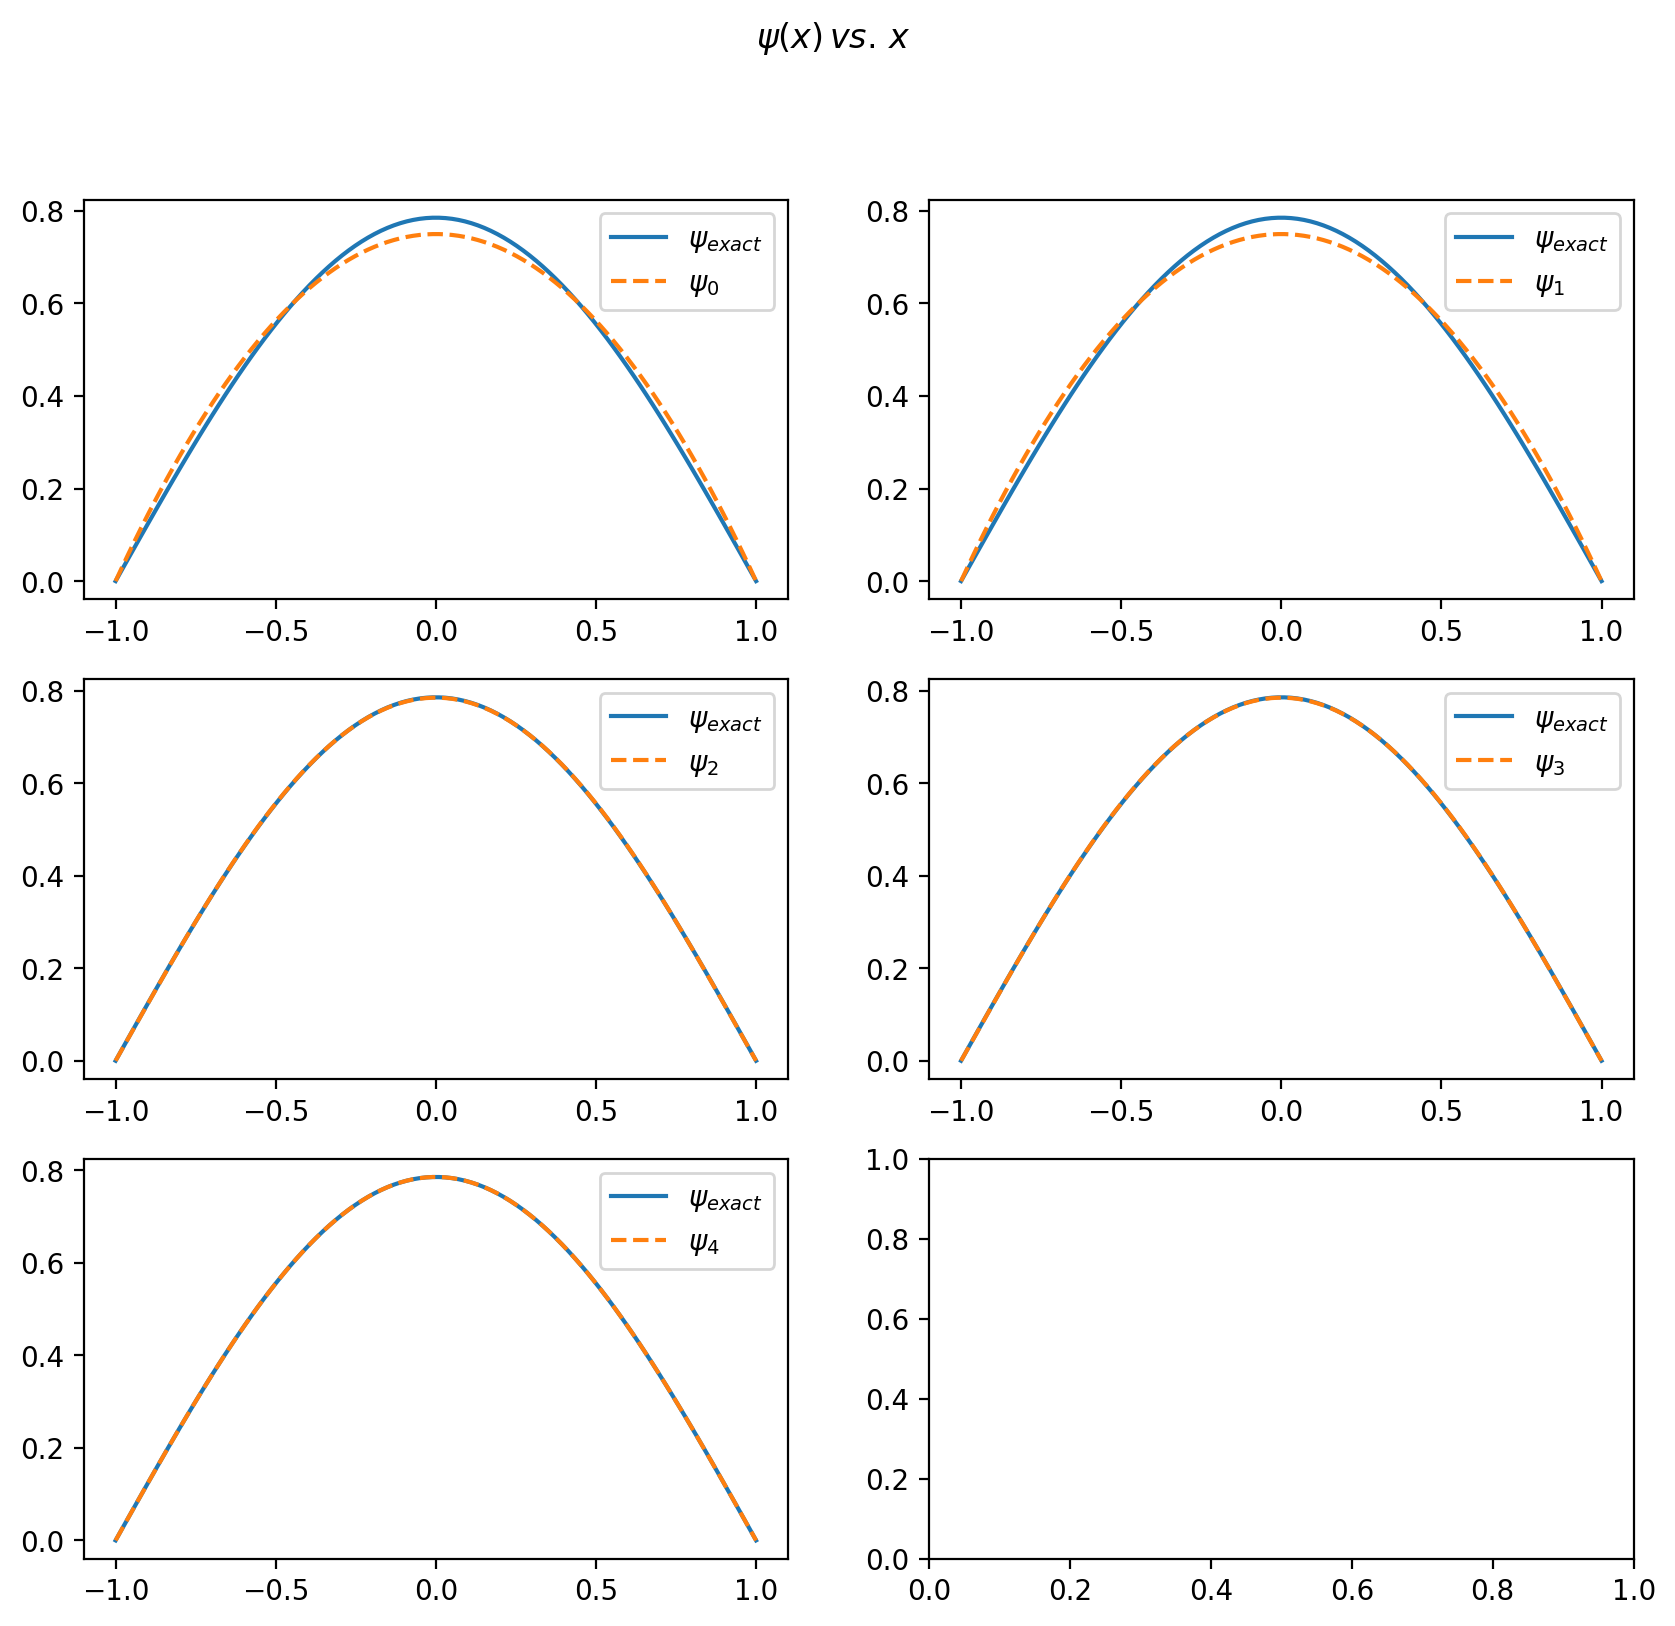

In [172]:
xx = np.linspace(-1, 1, 100)
C = np.pi / 4                                            # normalization constant    
psi_exact =  C * np.cos(np.pi * xx / 2)                  # exact normalized solution

fig, axs = plt.subplots(3, 2, figsize=(10, 9), dpi = 200)
plt.suptitle(r'$\psi(x)\, vs.\, x$')

for N in range(5):
    A = 1 / integrate(psi(coeffs_arr[N], N), -1, 1)[0]   # normalization constant    
    yy = A * (psi(coeffs_arr[N], N))(xx)                 # normalized numerical solution
    
    str = r'$\psi_{:}$'.format(N)
    c = N % 2
    r = N // 2
    
    axs[r, c].plot(xx, psi_exact, label=r'$\psi_{exact}$')
    axs[r, c].plot(xx, yy, '--', label=str)
    axs[r, c].legend()

plt.show()